# Pre-Processing

In [ ]:
import pandas as pd

games = pd.read_csv('Processed NFLGamesDB.csv', index_col = 0)
tnames = pd.read_csv('TeamNamesMap.csv')

tnames_df = pd.DataFrame(columns=['Team_Name', 'Year', 'Team_Symbol'])

for i in range(len(tnames)):
    team_name = tnames.iloc[i,0]
    begin_year = tnames.iloc[i,1]
    end_year = tnames.iloc[i,2]
    team_symbol = tnames.iloc[i,3]
    for j in range(begin_year, end_year+1):
        df_patch = pd.DataFrame({'Team_Name': [team_name], 'Year': [j], 'Team_Symbol': [team_symbol]})
        tnames_df = pd.concat([tnames_df, df_patch], ignore_index=True, axis=0)


tnames_df = tnames_df.astype({'Year':'int'})
        
tnamesV = tnames_df.copy()
tnamesH = tnames_df.copy()
tnamesV = tnamesV.rename(columns={'Team_Name': "Visitor", "Year":"Year", 'Team_Symbol': "Visitor_Symbol"})
tnamesH = tnamesH.rename(columns={'Team_Name': "Home", "Year":"Year", 'Team_Symbol': "Home_Symbol"})
games = pd.merge(games, tnamesV, on=['Visitor','Year'], how='left')
games = pd.merge(games, tnamesH, on=['Home', 'Year'], how='left')
games.head()

,Year,Week,YearWeekDesc,DayOfWeek,Date,StartTime,Visitor,Home,Score Difference,VScore,...,HFourthDownConv,HFourthDownAtt,HTimeOfPossession,HQ1S,HQ2S,HQ3S,HQ4S,HOTS,Visitor_Symbol,Home_Symbol
0,1999,1,1999 Week 1,Sunday,1999-09-12,8:26 PM,Pittsburgh Steelers,Cleveland Browns,43,43,...,0,7,731,0,0,0,0,0,PIT,CLE
1,2009,6,2009 Week 6,Sunday,2009-10-18,4:05 PM,Arizona Cardinals,Seattle Seahawks,24,27,...,0,11,1030,0,3,0,0,0,ARI,SEA
2,2018,17,2018 Week 17,Sunday,2018-12-30,4:25 PM,Philadelphia Eagles,Washington Redskins,24,24,...,0,9,1001,0,0,0,0,0,PHI,WAS
3,2008,13,2008 Week 13,Thursday,2008-11-27,12:37 PM,Tennessee Titans,Detroit Lions,37,47,...,0,11,1386,3,7,0,0,0,TEN,DET
4,1993,1,1993 Week 1,Sunday,1993-09-05,1:00 PM,Kansas City Chiefs,Tampa Bay Buccaneers,24,27,...,0,10,1771,3,0,0,0,0,KCC,TBB


In [ ]:
processed_games = pd.get_dummies(games, columns = ['DayOfWeek','Roof','Surface','Visitor_Symbol','Home_Symbol'])
#processed_games['Score Difference'] = processed_games['VScore']-processed_games['HScore']
processed_games = processed_games.drop(['YearWeekDesc','Date','StartTime','Visitor','Home','VScore','HScore','Stadium'],axis=1)


In [ ]:
pd.set_option('display.max_columns', None)
processed_games.head()

,Year,Week,Score Difference,Attendance,Temp,WindChill,RH,Wind,VFirstDowns,VRushAtt,VRushYards,VRushTD,VPassComp,VPassAtt,VPassYards,VPassTD,VPassInt,VSacked,VSackedYards,VNetPassYards,VNetTotalYards,VFumbles,VFumblesLost,VTurnovers,VPenalties,VPenaltyYards,VThirdDownConv,VThirdDownAtt,VFourthDownConv,VFourthDownAtt,VTimeOfPossession,VQ1S,VQ2S,VQ3S,VQ4S,VOTS,HFirstDowns,HRushAtt,HRushYards,HRushTD,HPassComp,HPassAtt,HPassYards,HPassTD,HPassInt,HSacked,HSackedYards,HNetPassYards,HNetTotalYards,HFumbles,HFumblesLost,HTurnovers,HPenalties,HPenaltyYards,HThirdDownConv,HThirdDownAtt,HFourthDownConv,HFourthDownAtt,HTimeOfPossession,HQ1S,HQ2S,HQ3S,HQ4S,HOTS,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Roof_dome,Roof_outdoors,Roof_retractable roof (closed),Roof_retractable roof (open),Surface_a_turf,Surface_astroplay,Surface_astroturf,Surface_dessograss,Surface_fieldturf,Surface_grass,Surface_matrixturf,Surface_sportturf,Visitor_Symbol_ARI,Visitor_Symbol_ATL,Visitor_Symbol_BAL,Visitor_Symbol_BUF,Visitor_Symbol_CAR,Visitor_Symbol_CHI,Visitor_Symbol_CIN,Visitor_Symbol_CLE,Visitor_Symbol_DAL,Visitor_Symbol_DEN,Visitor_Symbol_DET,Visitor_Symbol_GBP,Visitor_Symbol_HOU,Visitor_Symbol_IND,Visitor_Symbol_JAC,Visitor_Symbol_KCC,Visitor_Symbol_LAR,Visitor_Symbol_LVR,Visitor_Symbol_MIA,Visitor_Symbol_MIN,Visitor_Symbol_NEP,Visitor_Symbol_NOS,Visitor_Symbol_NYG,Visitor_Symbol_NYJ,Visitor_Symbol_PHI,Visitor_Symbol_PIT,Visitor_Symbol_SDC,Visitor_Symbol_SEA,Visitor_Symbol_SFF,Visitor_Symbol_TBB,Visitor_Symbol_TEN,Visitor_Symbol_WAS,Home_Symbol_ARI,Home_Symbol_ATL,Home_Symbol_BAL,Home_Symbol_BUF,Home_Symbol_CAR,Home_Symbol_CHI,Home_Symbol_CIN,Home_Symbol_CLE,Home_Symbol_DAL,Home_Symbol_DEN,Home_Symbol_DET,Home_Symbol_GBP,Home_Symbol_HOU,Home_Symbol_IND,Home_Symbol_JAC,Home_Symbol_KCC,Home_Symbol_LAR,Home_Symbol_LVR,Home_Symbol_MIA,Home_Symbol_MIN,Home_Symbol_NEP,Home_Symbol_NOS,Home_Symbol_NYG,Home_Symbol_NYJ,Home_Symbol_PHI,Home_Symbol_PIT,Home_Symbol_SDC,Home_Symbol_SEA,Home_Symbol_SFF,Home_Symbol_TBB,Home_Symbol_TEN,Home_Symbol_WAS
0,1999,1,43,73138,78,0,0.47,12,33,57,217,2,24,32,259,3,0,1,12,247,464,0,0,0,4,26,15,21,15,21,2869,7,13,6,17,0,2,9,9,0,6,16,52,0,2,3,21,31,40,2,2,4,4,23,0,7,0,7,731,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2009,6,24,67588,58,0,0.82,4,21,26,62,1,34,43,292,2,1,2,10,282,344,1,1,2,7,76,8,16,8,16,2570,14,3,7,3,0,7,11,14,0,11,30,154,0,1,5,40,114,128,2,1,2,6,56,0,11,0,11,1030,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2018,17,24,63188,46,46,0.00,3,25,34,129,0,29,34,243,3,1,3,12,231,360,1,0,1,5,25,8,14,8,14,2599,3,7,7,7,0,8,12,21,0,13,28,98,0,1,4,30,68,89,1,0,1,2,15,0,9,0,9,1001,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008,13,37,60112,70,0,0.00,0,19,46,292,4,12,19,181,0,0,1,17,164,456,1,1,1,9,65,8,16,8,16,2214,21,14,6,6,0,6,14,23,0,14,28,154,1,1,4,23,131,154,4,2,3,5,38,0,11,0,11,1386,3,7,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1993,1,24,63378,83,83,0.74,6,20,31,122,0,18,26,284,3,0,1,6,278,400,5,3,3,12,60,7,12,7,12,1829,0,17,7,3,0,15,20,25,0,20,35,140,0,1,1,8,132,157,2,0,1,4,57,0,10,0,10,1771,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from google.colab import files
processed_games.to_csv('Fully Processed NFLGamesDB.csv', encoding = 'utf-8-sig') 
files.download('Fully Processed NFLGamesDB.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# If you already have the fully processed data start here

Linear MSE:  24.520520945560243
Linear R^2:  0.8832599382852855
Lasso MSE:  78.80246677541359
Lasso R^2:  0.6252612386743752
Forest MSE:  49.35932651209183
Forest R^2:  0.7653540633381702
PCA MSE:  83.22605249373046
PCA R^2:  0.6041478467661433
Transformed MSE:  39.22493474457255
Transformed R^2:  0.8855100031106644


Text(0, 0.5, 'Residuals')

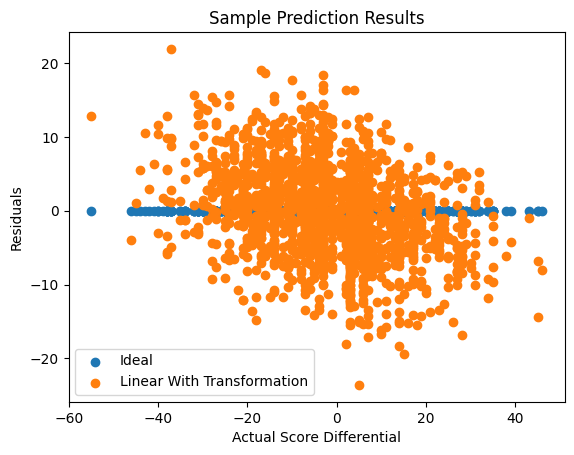

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math




data = pd.read_csv('Fully Processed NFLGamesDB.csv', index_col = 0)

data.dropna()

y = 'Score Difference'
x_names = list(data.columns)
x_names.remove(y)

features = data[x_names]
output = data[[y]]

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_list = []
r2_list = []
lr = LinearRegression()

rf = RandomForestRegressor(max_depth = 10)
mser_list = []
r2r_list = []

Lasso_mse = []
Lasso_r2 =[]

PCA_mse = []
PCA_r2 = []

mset = []
r2t =[]

for train_index, test_index in kf.split(features):
    X_train, X_test = features.loc[train_index], features.loc[test_index]
    y_train, y_test = output.loc[train_index], output.loc[test_index]
    sig_train, sig_test = output.loc[train_index], output.loc[test_index]
    
    #Transformed Linear
    #sig_train = sig_train.apply(lambda row : 98/(1+math.exp(-0.1*row[0]))-49, axis = 1)
    #sig_test = sig_test.apply(lambda row : 98/(1+math.exp(-0.1*row[0]))-49, axis = 1)
    sig_train = sig_train.apply(lambda row : row[0]+2*np.cbrt(row[0]), axis = 1)
    sig_test = sig_test.apply(lambda row : row[0]+2*np.cbrt(row[0]), axis = 1)
    
    lr.fit(X_train, sig_train)
    yt_pred = lr.predict(X_test)
    #invert = lambda t : -10*(math.log(((t+49)/98)**(-1)-1))
    #yt_pred = np.array([invert(x) for x in yt_pred]).T
    r2 = r2_score(sig_test, yt_pred)
    mse = mean_squared_error(sig_test,yt_pred)
    mset.append(mse)
    r2t.append(r2)

    #Linear Regression
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mse_list.append(mse)
    r2_list.append(r2)

    #Lasso Regression with LR
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_train, y_train.values.ravel())
    yL_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, yL_pred)
    r2 = r2_score(y_test, yL_pred)
    Lasso_mse.append(mse)
    Lasso_r2.append(r2)

    #PCA
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=5)), ('regressor', LinearRegression())])
    pipe.fit(X_train, y_train)
    yp_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, yp_pred)
    r2 = r2_score(y_test, yp_pred)
    PCA_mse.append(mse)
    PCA_r2.append(r2)

    #Random Forest
    rf.fit(X_train,y_train.values.ravel())
    yr_pred = rf.predict(X_test)
    r2 = r2_score(y_test, yr_pred)
    mse = mean_squared_error(y_test,yr_pred)
    mser_list.append(mse)
    r2r_list.append(r2)
    

print('Linear MSE: ', np.mean(mse_list))
print('Linear R^2: ', np.mean(r2_list))
print('Lasso MSE: ', np.mean(Lasso_mse))
print('Lasso R^2: ', np.mean(Lasso_r2))
print('Forest MSE: ', np.mean(mser_list))
print('Forest R^2: ', np.mean(r2r_list))
print('PCA MSE: ', np.mean(PCA_mse))
print('PCA R^2: ', np.mean(PCA_r2))
print('Transformed MSE: ', np.mean(mset))
print('Transformed R^2: ', np.mean(r2t))

plt.scatter(y_test,y_test-y_test, label = 'Ideal')
#plt.scatter(y_test,y_pred-y_test, label = 'Linear Regression')
#plt.scatter(y_test,yL_pred.reshape(np.shape(yL_pred)[0],1)-y_test, label = 'Linear with Lasso')
#plt.scatter(y_test,yr_pred.reshape(np.shape(yr_pred)[0],1)-y_test, label = 'Random Forest')
#plt.scatter(y_test,yp_pred-y_test, label= 'Linear With PCA')
plt.scatter(y_test,yt_pred-sig_test, label= 'Linear With Transformation')

plt.legend()
plt.title('Sample Prediction Results')
plt.xlabel('Actual Score Differential')
plt.ylabel('Residuals')


In [ ]:
for x in lr.coef_:
  coefs = x

feature_names = []
for y in lr.feature_names_in_:
  feature_names.append(y)

pd.set_option('display.max_rows', None)
print(lr.intercept_)
print(pd.Series(coefs, index = feature_names).sort_values())

[-22.03073712]
HPassTD                          -3.318848
HRushTD                          -3.168237
Home_Symbol_BAL                  -1.672805
VTurnovers                       -1.527976
Home_Symbol_NEP                  -1.437684
DayOfWeek_Friday                 -1.257730
DayOfWeek_Tuesday                -1.175576
Surface_dessograss               -1.148044
Home_Symbol_GBP                  -1.075985
VFumblesLost                     -0.850821
Visitor_Symbol_CAR               -0.721023
VPassInt                         -0.677156
Visitor_Symbol_WAS               -0.628594
Home_Symbol_CHI                  -0.610044
Visitor_Symbol_HOU               -0.590684
Home_Symbol_SDC                  -0.507275
Visitor_Symbol_CIN               -0.490450
Visitor_Symbol_NYG               -0.487034
Visitor_Symbol_ARI               -0.485618
Visitor_Symbol_LAR               -0.434815
VPassAtt                         -0.374927
Home_Symbol_JAC                  -0.366961
Visitor_Symbol_TBB               -0.363

In [ ]:
output_sig = output.apply(lambda row : row[0]+2*np.cbrt(row[0]), axis = 1)

<Axes: ylabel='Density'>

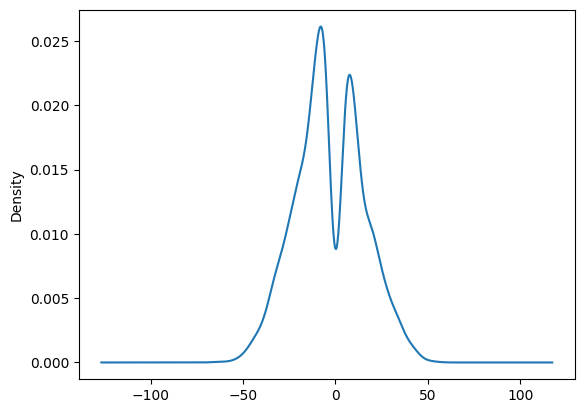

In [ ]:
output_sig.plot(kind = 'kde')

<Axes: ylabel='Density'>

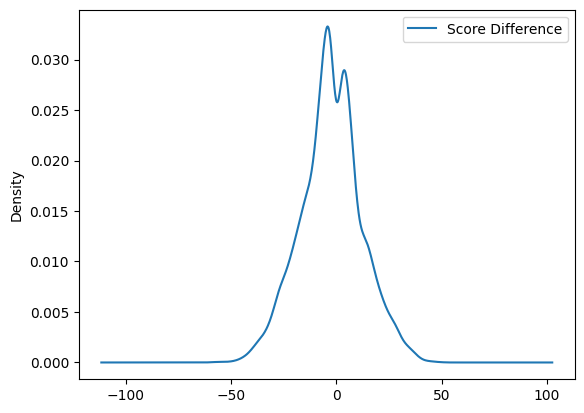

In [ ]:
output.plot(kind = 'kde')

In [ ]:
output.size

8302

In [ ]:
plt.figure(figsize=(12,4*30))
for i,c in enumerate(data.columns):
    if i<=57:
        plt.subplot(15,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

<Axes: ylabel='Frequency'>

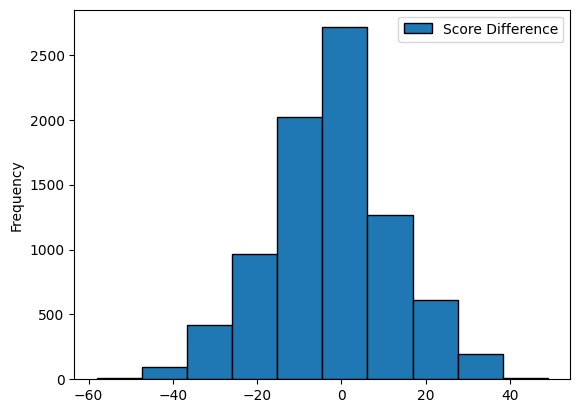

In [ ]:
output.plot(kind='hist', edgecolor='black')